# Algunos conjuntos de imágenes comunes

## MNIST

**MNIST** consta de 60K+10K imágenes $28\times 28$ ($D=784$) de los 10 dígitos manuscritos.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
x_train, x_test, y_train, y_test  = train_test_split(mnist_784_X, mnist_784_y, test_size=10000, random_state=1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


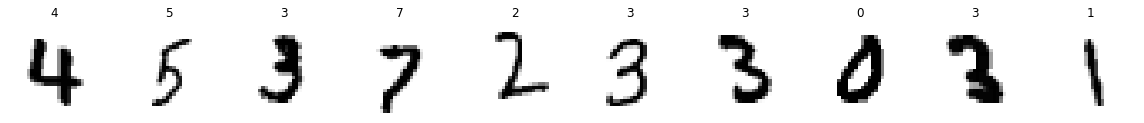

In [2]:
import matplotlib.pyplot as plt
nrows = 1; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, xn, yn in zip(axs.flat, x_train, y_train):
    ax.set_axis_off(); image = xn.reshape(28, 28); ax.set_title(f"{yn}")
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

## EMNIST

**Extended MNIST (EMNIST)** es un corpus de $814\,255$ imágenes $28\times 28$ de 62 caracteres manuscritos ([0-9], [a-z] y [A-Z]). Publicado en 2017, se recomienda consultar la [página web de EMNIST](https://www.nist.gov/itl/iad/image-group/emnist-dataset) para más detalles. A continuación empleamos el [librería python emnist](https://pypi.org/project/emnist) para leerlo.

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples, extract_test_samples
dataset = 'balanced'
X_train, y_train = extract_training_samples(dataset)
X_test, y_test = extract_test_samples(dataset)
print(dataset, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

balanced (112800, 28, 28) (112800,) (18800, 28, 28) (18800,)


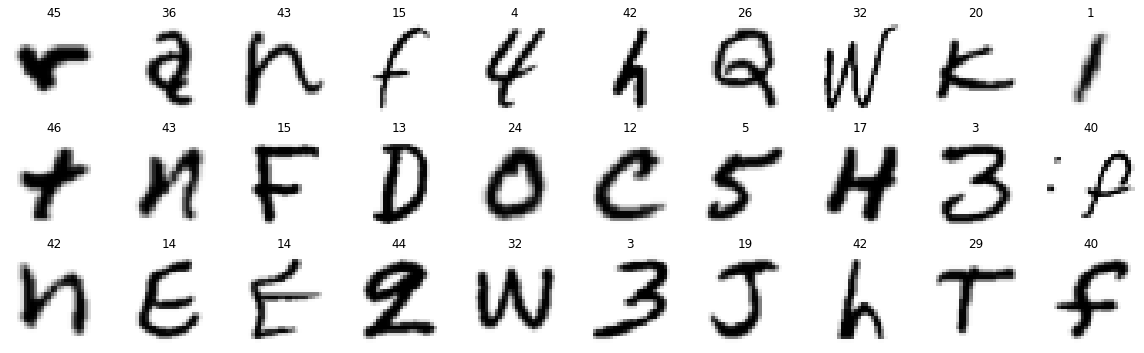

In [5]:
import matplotlib.pyplot as plt
nrows = 3; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, xn, yn in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = xn.reshape(28, 28); ax.set_title(f"{yn}")
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

## Fashion-MNIST

**Fashion-MNIST** incluye 60K+10K imágenes $28\times 28$ de 10 clases.

## CIFAR

**CIFAR** consta de 50K+10K imágenes $32\times 32\times 3$ (RGB) de 10 clases.

## ImageNet

**ImageNet** se compone de 14M imágenes $256\times 256\times 3$ de objetos de 20K clases.
